In [1]:
# Import basic libraries
import pandas as pd
import numpy as np

# For plots
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Load data using corrected path
df = pd.read_csv("C:/Users/bikra/Downloads/nfhs_health_project_data1.csv")

print("Shape of data:", df.shape)
df.head()


Shape of data: (57693, 15)


,mv248,mv250,v106,v107,v190,v024,v025,v012,v130,v131,v201,v501,v005,v021,v022
0,NaN,NaN,2,3.0,5,1,2,29,2,991,1,1,0.201224,130,121
1,NaN,NaN,1,3.0,3,1,2,36,2,991,4,1,0.201224,130,121
2,NaN,NaN,0,NaN,3,1,2,48,2,992,2,1,0.196628,109,121
3,NaN,NaN,2,5.0,2,1,2,39,2,991,5,1,0.196628,109,121
4,1.0,1.0,2,5.0,4,1,2,31,2,992,2,1,0.196628,109,121


In [3]:
# Step 1: Drop the unwanted column 'mv250' 
if 'mv250' in df.columns:
    df = df.drop(columns=['mv250'])
    print("Dropped column 'mv250'.")

# Step 2: Rename columns properly
rename_dict = {
    'v106': 'education_level',
    'v107': 'years_of_education',
    'v190': 'wealth_index',
    'v024': 'region',
    'v025': 'residence_type',
    'v012': 'mother_age',
    'v130': 'religion',
    'v131': 'caste',
    'v201': 'total_children_born',
    'v501': 'marital_status',
    'v005': 'sample_weight',
    'v021': 'psu',
    'v022': 'strata',
    'mv248': 'antenatal_checkups'   
}

df = df.rename(columns=rename_dict)

print("Shape of data:", df.shape)
df.head(10)

Dropped column 'mv250'.
Shape of data: (57693, 14)


,antenatal_checkups,education_level,years_of_education,wealth_index,region,residence_type,mother_age,religion,caste,total_children_born,marital_status,sample_weight,psu,strata
0,NaN,2,3.0,5,1,2,29,2,991,1,1,0.201224,130,121
1,NaN,1,3.0,3,1,2,36,2,991,4,1,0.201224,130,121
2,NaN,0,NaN,3,1,2,48,2,992,2,1,0.196628,109,121
3,NaN,2,5.0,2,1,2,39,2,991,5,1,0.196628,109,121
4,1.0,2,5.0,4,1,2,31,2,992,2,1,0.196628,109,121
5,NaN,2,7.0,4,1,2,32,2,992,0,1,0.196628,109,121
6,1.0,3,3.0,4,1,2,25,2,991,1,1,0.196628,109,121
7,NaN,0,NaN,2,1,2,35,2,991,4,1,0.196628,109,121
8,1.0,2,5.0,4,1,2,26,2,992,1,1,0.196628,109,121
9,NaN,2,5.0,2,1,2,30,2,991,3,1,0.196628,109,121


Value counts:
antenatal_checkups
NaN    42719
1.0    14106
0.0      705
8.0      163
Name: count, dtype: int64


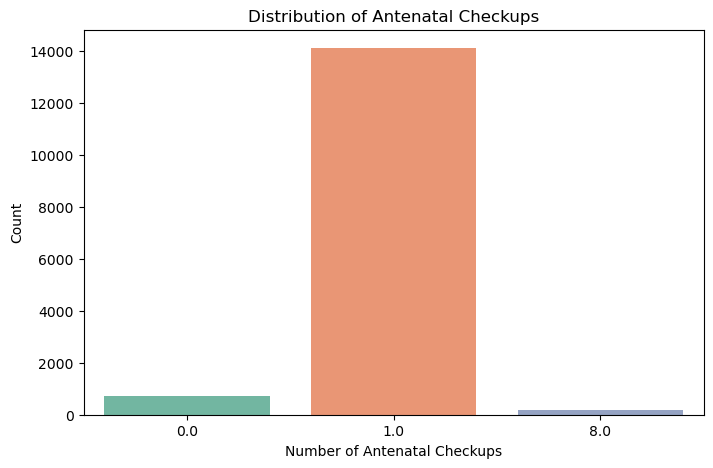

In [4]:
# Checking unique values and their counts
print("Value counts:")
print(df['antenatal_checkups'].value_counts(dropna=False))

# Plotting the distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='antenatal_checkups', palette='Set2')
plt.title('Distribution of Antenatal Checkups')
plt.xlabel('Number of Antenatal Checkups')
plt.ylabel('Count')
plt.show()


In [5]:
df['religion'].value_counts()

religion
1     43980
2      6750
3      4096
4      1250
5       774
96      735
6        76
9        26
8         5
7         1
Name: count, dtype: int64

In [6]:
# Step 1: Drop rows where 'antenatal_checkups' is NaN
df = df.dropna(subset=['antenatal_checkups'])

# Step 2: Remove rows where 'antenatal_checkups' == 8.0
df = df[df['antenatal_checkups'] != 8.0]

# Step 3: Check the result
print("Value counts after cleaning:")
print(df['antenatal_checkups'].value_counts())



Value counts after cleaning:
antenatal_checkups
1.0    14106
0.0      705
Name: count, dtype: int64


In [8]:
df.head()

,antenatal_checkups,education_level,years_of_education,wealth_index,region,residence_type,mother_age,religion,caste,total_children_born,marital_status,sample_weight,psu,strata
4,1.0,2,5.0,4,1,2,31,2,992,2,1,0.196628,109,121
6,1.0,3,3.0,4,1,2,25,2,991,1,1,0.196628,109,121
8,1.0,2,5.0,4,1,2,26,2,992,1,1,0.196628,109,121
17,1.0,2,3.0,4,1,2,30,2,991,2,1,0.190855,121,121
21,1.0,2,4.0,3,1,2,30,2,991,1,1,0.198268,127,121


In [9]:
# Define independent variables
independent_vars = [
    'education_level', 'years_of_education', 'wealth_index', 'region',
    'residence_type', 'mother_age', 'religion', 'caste',
    'total_children_born', 'marital_status'
]

# Selecting only these columns
X = df[independent_vars]

# Manual classification
numerical_cols = ['mother_age', 'total_children_born','years_of_education']
categorical_cols = [
    'education_level', 'wealth_index', 'region',
    'residence_type', 'religion', 'caste', 'marital_status'
]

# Print results
print(" Numerical Variables:")
print(numerical_cols)

print("\n Categorical Variables:")
print(categorical_cols)


 Numerical Variables:
['mother_age', 'total_children_born', 'years_of_education']

 Categorical Variables:
['education_level', 'wealth_index', 'region', 'residence_type', 'religion', 'caste', 'marital_status']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14811 entries, 4 to 57690
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   antenatal_checkups   14811 non-null  float64
 1   education_level      14811 non-null  int64  
 2   years_of_education   11888 non-null  float64
 3   wealth_index         14811 non-null  int64  
 4   region               14811 non-null  int64  
 5   residence_type       14811 non-null  int64  
 6   mother_age           14811 non-null  int64  
 7   religion             14811 non-null  int64  
 8   caste                14811 non-null  int64  
 9   total_children_born  14811 non-null  int64  
 10  marital_status       14811 non-null  int64  
 11  sample_weight        14811 non-null  float64
 12  psu                  14811 non-null  int64  
 13  strata               14811 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.7 MB


In [11]:
# List of numerical variables
numerical_cols = ['years_of_education', 'mother_age', 'total_children_born']

# Select only numerical columns
numerical_data = df[numerical_cols]

# Perform descriptive statistics
print("Descriptive Statistics for Numerical Variables:")
print(numerical_data.describe())


Descriptive Statistics for Numerical Variables:
       years_of_education    mother_age  total_children_born
count        11888.000000  14811.000000         14811.000000
mean             4.225942     27.176828             2.224630
std              1.676221      5.090391             1.375528
min              0.000000     15.000000             0.000000
25%              3.000000     24.000000             1.000000
50%              4.000000     26.000000             2.000000
75%              5.000000     30.000000             3.000000
max              8.000000     49.000000            16.000000


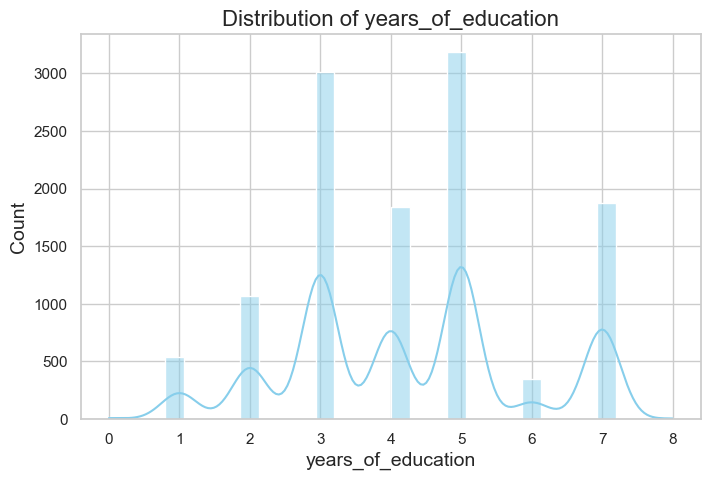

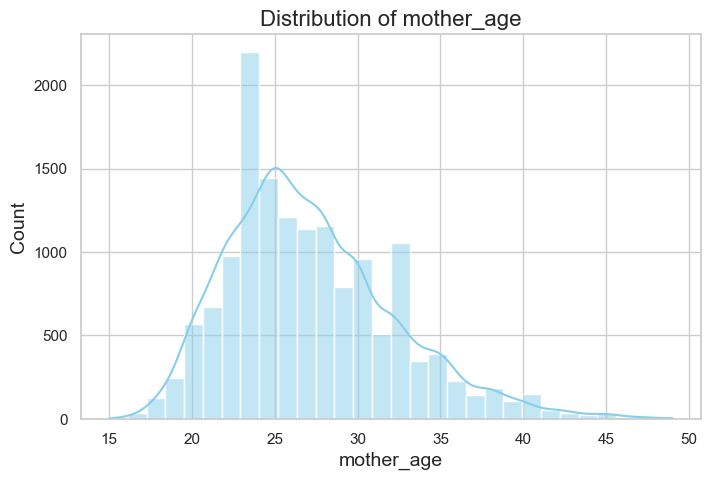

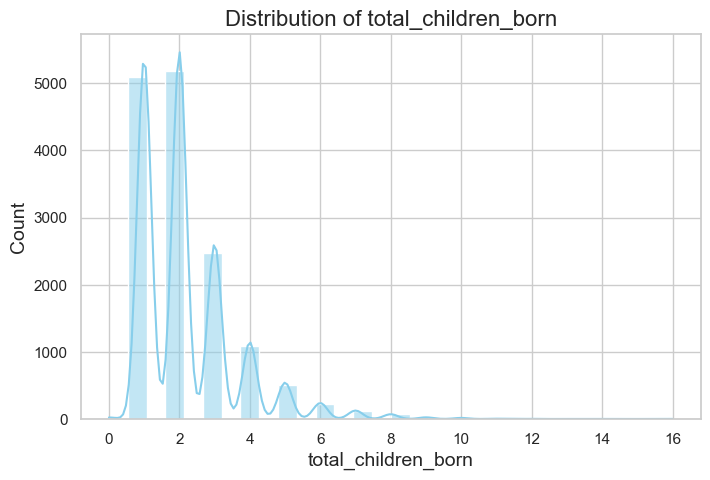

In [12]:
# Set plot style
sns.set(style="whitegrid")

# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)
    plt.show()


In [13]:
# Define mappings based on your provided information

# 1. region
state_mapping = {
    1: 'Jammu & Kashmir',
    2: 'Himachal Pradesh',
    3: 'Punjab',
    4: 'Chandigarh',
    5: 'Uttarakhand',
    6: 'Haryana',
    7: 'Nct Of Delhi',
    8: 'Rajasthan',
    9: 'Uttar Pradesh',
    10: 'Bihar',
    11: 'Sikkim',
    12: 'Arunachal Pradesh',
    13: 'Nagaland',
    14: 'Manipur',
    15: 'Mizoram',
    16: 'Tripura',
    17: 'Meghalaya',
    18: 'Assam',
    19: 'West Bengal',
    20: 'Jharkhand',
    21: 'Odisha',
    22: 'Chhattisgarh',
    23: 'Madhya Pradesh',
    24: 'Gujarat',
    25: 'Dadra & Nagar Haveli And Daman & Diu',
    27: 'Maharashtra',
    28: 'Andhra Pradesh',
    29: 'Karnataka',
    30: 'Goa',
    31: 'Lakshadweep',
    32: 'Kerala',
    33: 'Tamil Nadu',
    34: 'Puducherry',
    35: 'Andaman & Nicobar Islands',
    36: 'Telangana',
    37: 'Ladakh'
}

# 2. Religion
religion_mapping = {
    1: 'Hindu',
    2: 'Muslim',
    3: 'Christian',
    4: 'Sikh',
    5: 'Buddhist / Neo-Buddhist',
    6: 'Jain',
    7: 'Jewish',
    8: 'Parsi / Zoroastrian',
    9: 'No religion',
    96: 'Other'
}

# 3. caste
ethnicity_mapping = {
    991: 'Caste',
    992: 'Tribe',
    993: 'No caste / tribe',
    998: "Don't know"
}

# 4. Current Marital Status
marital_status_mapping = {
    0: 'Never in union',
    1: 'Married',
    2: 'Living with partner',
    3: 'Widowed',
    4: 'Divorced',
    5: 'No longer living together/separated',
    9: 'Missing'  # 'm' was 9 — missing data
}

#5. highest education level
education_level_mapping = {
    0: 'No eductaion',
    1: 'Primary',
    2: 'Secondary',
    3: 'Higher',
    9: 'Misiing'
}

#6. Wealth index
wealth_mapping = {
    1: 'Poorest',
    2: 'Poorer',
    3: 'Middle',
    4: 'Richer',
    5: 'Richest'
}

#7. Residance 
residance_mapping = {
    1: 'Urban',
    2: 'Rural'
}
# ---------------------------
# Apply the mappings

# Assuming your dataframe column names are like below, adjust if needed
df['region'] = df['region'].map(state_mapping)
df['religion'] = df['religion'].map(religion_mapping)
df['caste'] = df['caste'].map(ethnicity_mapping)
df['marital_status'] = df['marital_status'].map(marital_status_mapping)
df['residence_type'] = df['residence_type'].map(residance_mapping)
df['wealth_index'] = df['wealth_index'].map(wealth_mapping)
df['education_level'] = df['education_level'].map(education_level_mapping)

# ---------------------------
# Quick check
print("Sample of mapped categorical variables:")
df.head(10)


Sample of mapped categorical variables:


,antenatal_checkups,education_level,years_of_education,wealth_index,region,residence_type,mother_age,religion,caste,total_children_born,marital_status,sample_weight,psu,strata
4,1.0,Secondary,5.0,Richer,Jammu & Kashmir,Rural,31,Muslim,Tribe,2,Married,0.196628,109,121
6,1.0,Higher,3.0,Richer,Jammu & Kashmir,Rural,25,Muslim,Caste,1,Married,0.196628,109,121
8,1.0,Secondary,5.0,Richer,Jammu & Kashmir,Rural,26,Muslim,Tribe,1,Married,0.196628,109,121
17,1.0,Secondary,3.0,Richer,Jammu & Kashmir,Rural,30,Muslim,Caste,2,Married,0.190855,121,121
21,1.0,Secondary,4.0,Middle,Jammu & Kashmir,Rural,30,Muslim,Caste,1,Married,0.198268,127,121
29,1.0,Secondary,3.0,Poorer,Jammu & Kashmir,Rural,27,Muslim,Caste,1,Married,0.327463,111,122
31,1.0,No eductaion,NaN,Poorest,Jammu & Kashmir,Rural,41,Muslim,Caste,5,Married,0.327463,111,122
34,1.0,Secondary,7.0,Richest,Jammu & Kashmir,Rural,33,Muslim,Caste,1,Married,0.311428,114,122
39,1.0,Secondary,5.0,Richer,Jammu & Kashmir,Rural,30,Muslim,Caste,1,Married,0.311428,114,122
41,1.0,Secondary,7.0,Middle,Jammu & Kashmir,Rural,33,Muslim,Caste,2,Married,0.340045,103,122


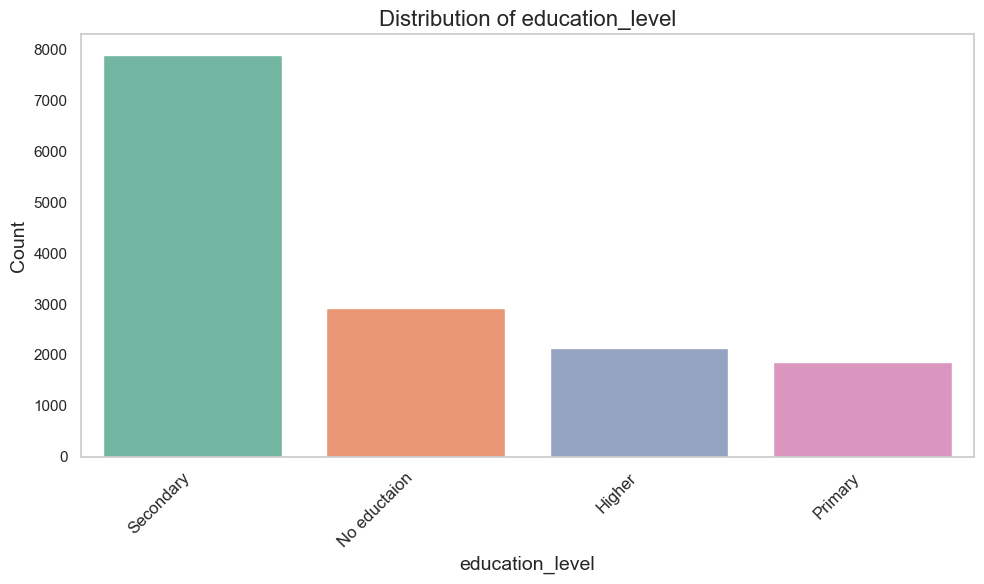

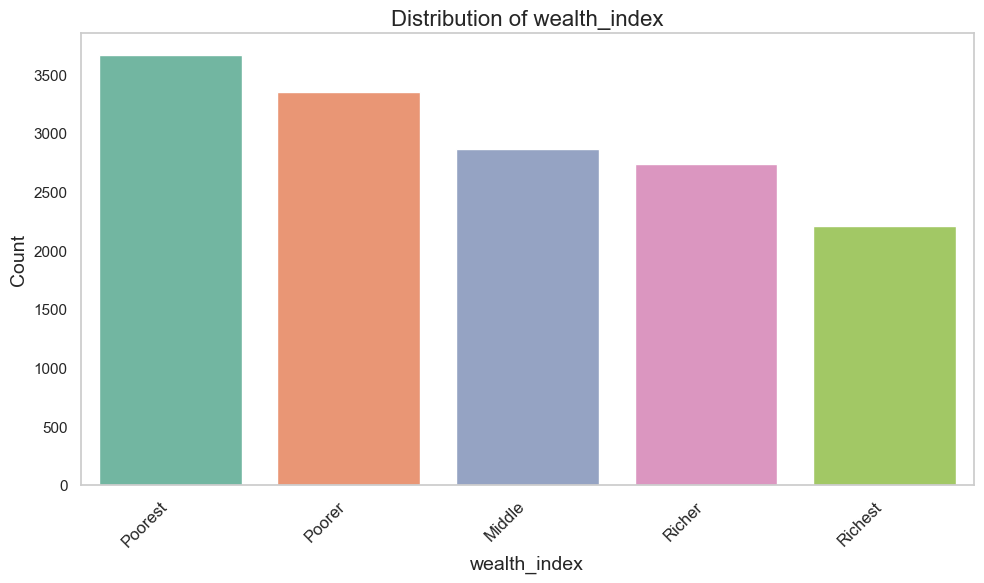

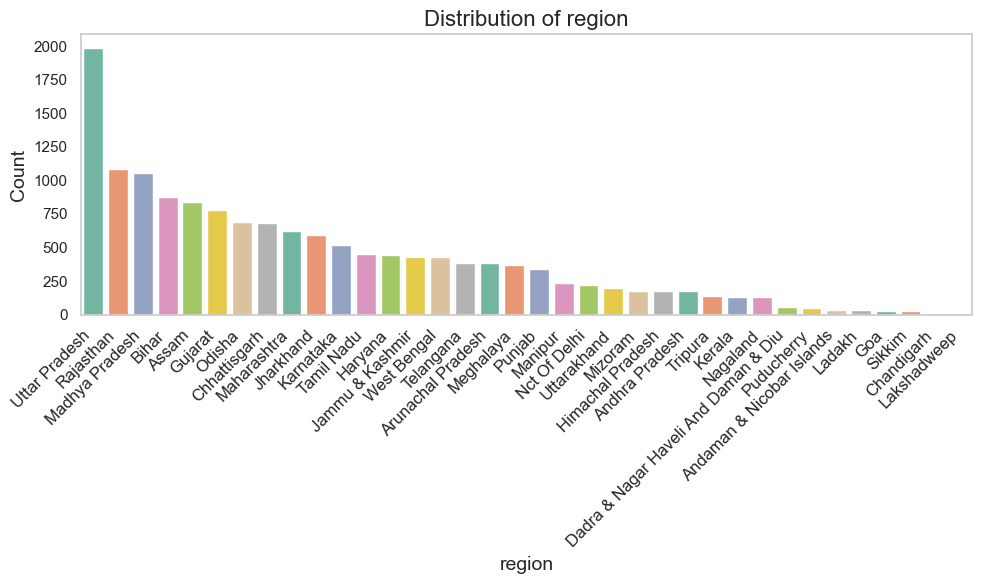

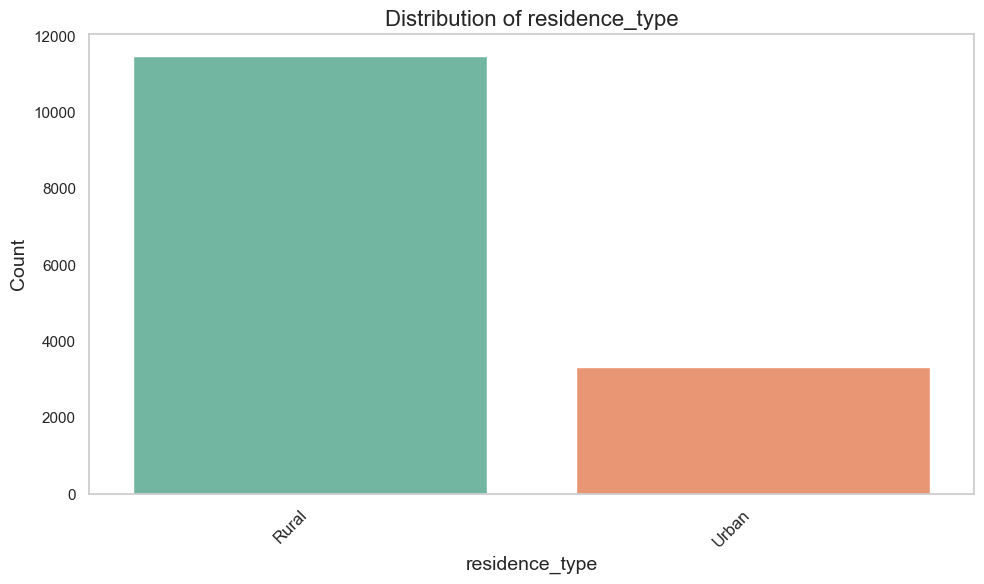

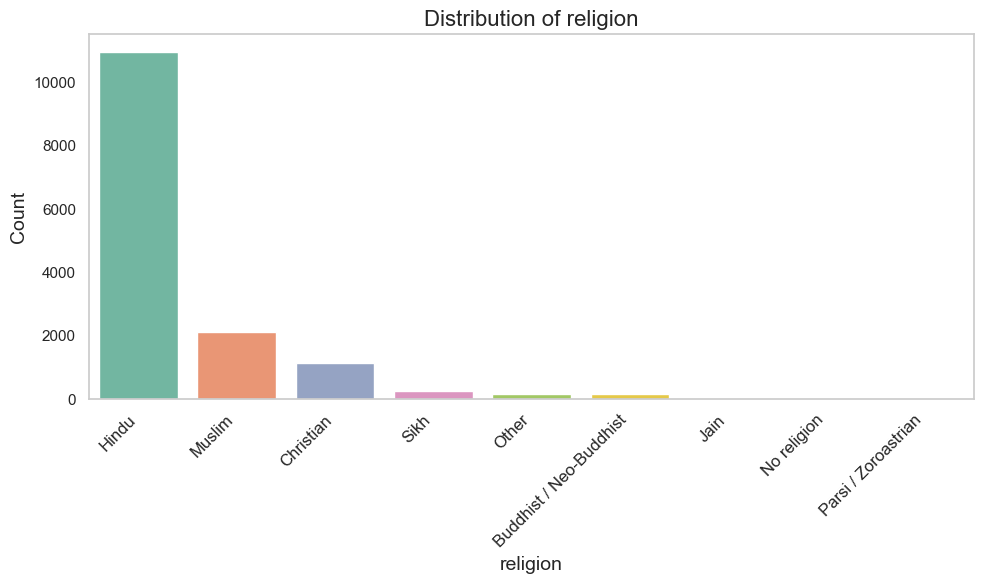

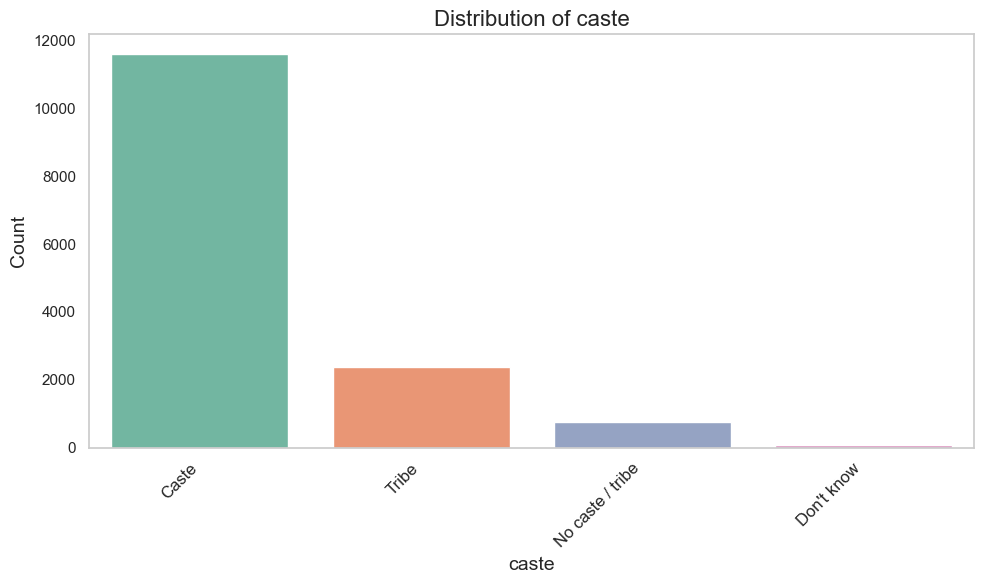

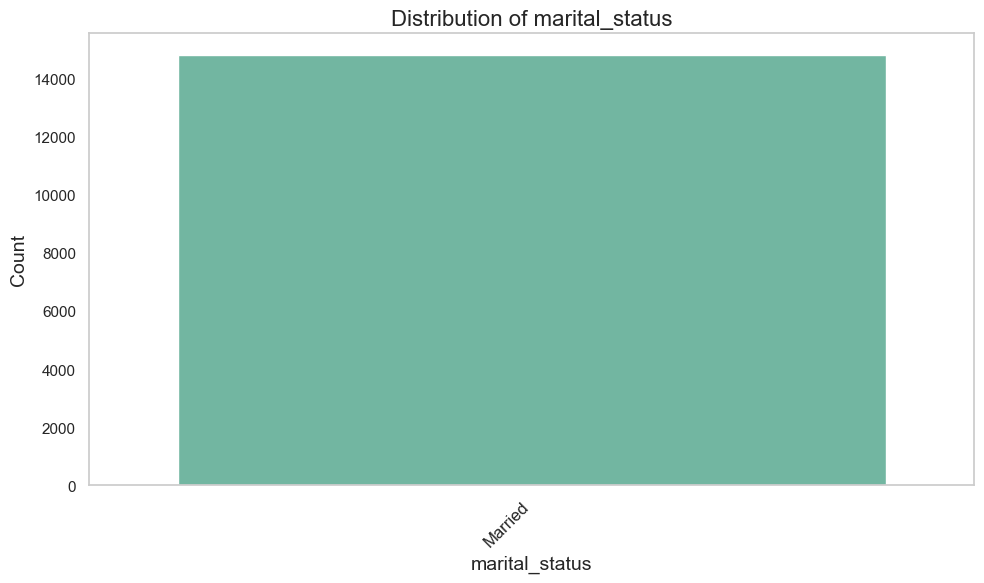

In [14]:
# List of your mapped categorical columns
categorical_cols = [
    'education_level', 'wealth_index', 'region', 'residence_type',
    'religion', 'caste', 'marital_status'
]

# Set Seaborn style
sns.set(style="whitegrid")

# Plot countplots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Drop NaN values during plotting
    sns.countplot(data=df, x=col, order=df[col].dropna().value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [15]:
# Check number of missing values in each column
print(df.isnull().sum())

antenatal_checkups        0
education_level           0
years_of_education     2923
wealth_index              0
region                    0
residence_type            0
mother_age                0
religion                  0
caste                     0
total_children_born       0
marital_status            0
sample_weight             0
psu                       0
strata                    0
dtype: int64


In [16]:
df.head(10)

,antenatal_checkups,education_level,years_of_education,wealth_index,region,residence_type,mother_age,religion,caste,total_children_born,marital_status,sample_weight,psu,strata
4,1.0,Secondary,5.0,Richer,Jammu & Kashmir,Rural,31,Muslim,Tribe,2,Married,0.196628,109,121
6,1.0,Higher,3.0,Richer,Jammu & Kashmir,Rural,25,Muslim,Caste,1,Married,0.196628,109,121
8,1.0,Secondary,5.0,Richer,Jammu & Kashmir,Rural,26,Muslim,Tribe,1,Married,0.196628,109,121
17,1.0,Secondary,3.0,Richer,Jammu & Kashmir,Rural,30,Muslim,Caste,2,Married,0.190855,121,121
21,1.0,Secondary,4.0,Middle,Jammu & Kashmir,Rural,30,Muslim,Caste,1,Married,0.198268,127,121
29,1.0,Secondary,3.0,Poorer,Jammu & Kashmir,Rural,27,Muslim,Caste,1,Married,0.327463,111,122
31,1.0,No eductaion,NaN,Poorest,Jammu & Kashmir,Rural,41,Muslim,Caste,5,Married,0.327463,111,122
34,1.0,Secondary,7.0,Richest,Jammu & Kashmir,Rural,33,Muslim,Caste,1,Married,0.311428,114,122
39,1.0,Secondary,5.0,Richer,Jammu & Kashmir,Rural,30,Muslim,Caste,1,Married,0.311428,114,122
41,1.0,Secondary,7.0,Middle,Jammu & Kashmir,Rural,33,Muslim,Caste,2,Married,0.340045,103,122


In [17]:
df['years_of_education'].fillna(0, inplace=True)


In [18]:
df.head(10)

,antenatal_checkups,education_level,years_of_education,wealth_index,region,residence_type,mother_age,religion,caste,total_children_born,marital_status,sample_weight,psu,strata
4,1.0,Secondary,5.0,Richer,Jammu & Kashmir,Rural,31,Muslim,Tribe,2,Married,0.196628,109,121
6,1.0,Higher,3.0,Richer,Jammu & Kashmir,Rural,25,Muslim,Caste,1,Married,0.196628,109,121
8,1.0,Secondary,5.0,Richer,Jammu & Kashmir,Rural,26,Muslim,Tribe,1,Married,0.196628,109,121
17,1.0,Secondary,3.0,Richer,Jammu & Kashmir,Rural,30,Muslim,Caste,2,Married,0.190855,121,121
21,1.0,Secondary,4.0,Middle,Jammu & Kashmir,Rural,30,Muslim,Caste,1,Married,0.198268,127,121
29,1.0,Secondary,3.0,Poorer,Jammu & Kashmir,Rural,27,Muslim,Caste,1,Married,0.327463,111,122
31,1.0,No eductaion,0.0,Poorest,Jammu & Kashmir,Rural,41,Muslim,Caste,5,Married,0.327463,111,122
34,1.0,Secondary,7.0,Richest,Jammu & Kashmir,Rural,33,Muslim,Caste,1,Married,0.311428,114,122
39,1.0,Secondary,5.0,Richer,Jammu & Kashmir,Rural,30,Muslim,Caste,1,Married,0.311428,114,122
41,1.0,Secondary,7.0,Middle,Jammu & Kashmir,Rural,33,Muslim,Caste,2,Married,0.340045,103,122


In [19]:
df.tail(10)

,antenatal_checkups,education_level,years_of_education,wealth_index,region,residence_type,mother_age,religion,caste,total_children_born,marital_status,sample_weight,psu,strata
57656,1.0,Secondary,7.0,Richer,Ladakh,Rural,23,Muslim,Tribe,2,Married,0.048665,404,422
57660,1.0,Secondary,7.0,Richer,Ladakh,Rural,32,Muslim,Tribe,3,Married,0.048189,428,423
57662,1.0,Primary,5.0,Poorer,Ladakh,Rural,28,Muslim,Tribe,2,Married,0.048189,428,423
57663,1.0,No eductaion,0.0,Middle,Ladakh,Rural,30,Muslim,Tribe,1,Married,0.048189,428,423
57676,1.0,Secondary,7.0,Poorer,Ladakh,Rural,29,Muslim,No caste / tribe,2,Married,0.045509,419,423
57677,1.0,Secondary,6.0,Richer,Ladakh,Rural,28,Muslim,Tribe,1,Married,0.046430,425,423
57679,1.0,Secondary,7.0,Poorer,Ladakh,Rural,28,Muslim,Tribe,1,Married,0.046430,425,423
57680,1.0,Higher,1.0,Middle,Ladakh,Rural,27,Muslim,Tribe,1,Married,0.046430,425,423
57686,1.0,Secondary,7.0,Richer,Ladakh,Urban,34,Muslim,Tribe,1,Married,0.047844,426,41
57690,1.0,Higher,2.0,Richer,Ladakh,Urban,37,Muslim,Caste,3,Married,0.050931,420,41


In [20]:
# Shape and structure
print("Shape of the dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())


Shape of the dataset: (14811, 14)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 14811 entries, 4 to 57690
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   antenatal_checkups   14811 non-null  float64
 1   education_level      14811 non-null  object 
 2   years_of_education   14811 non-null  float64
 3   wealth_index         14811 non-null  object 
 4   region               14811 non-null  object 
 5   residence_type       14811 non-null  object 
 6   mother_age           14811 non-null  int64  
 7   religion             14811 non-null  object 
 8   caste                14811 non-null  object 
 9   total_children_born  14811 non-null  int64  
 10  marital_status       14811 non-null  object 
 11  sample_weight        14811 non-null  float64
 12  psu                  14811 non-null  int64  
 13  strata               14811 non-null  int64  
dtypes: float64(3), int64(4),

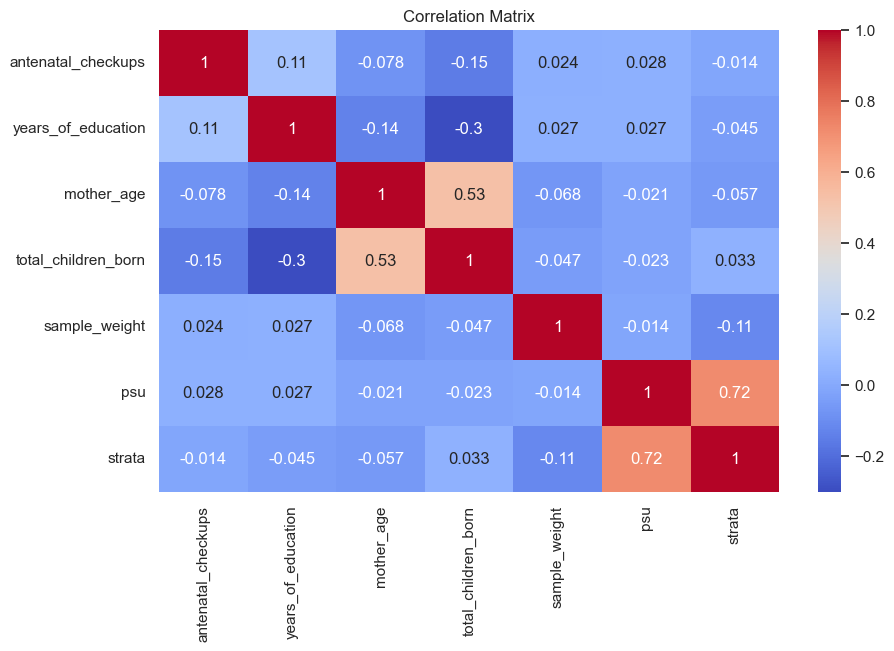

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

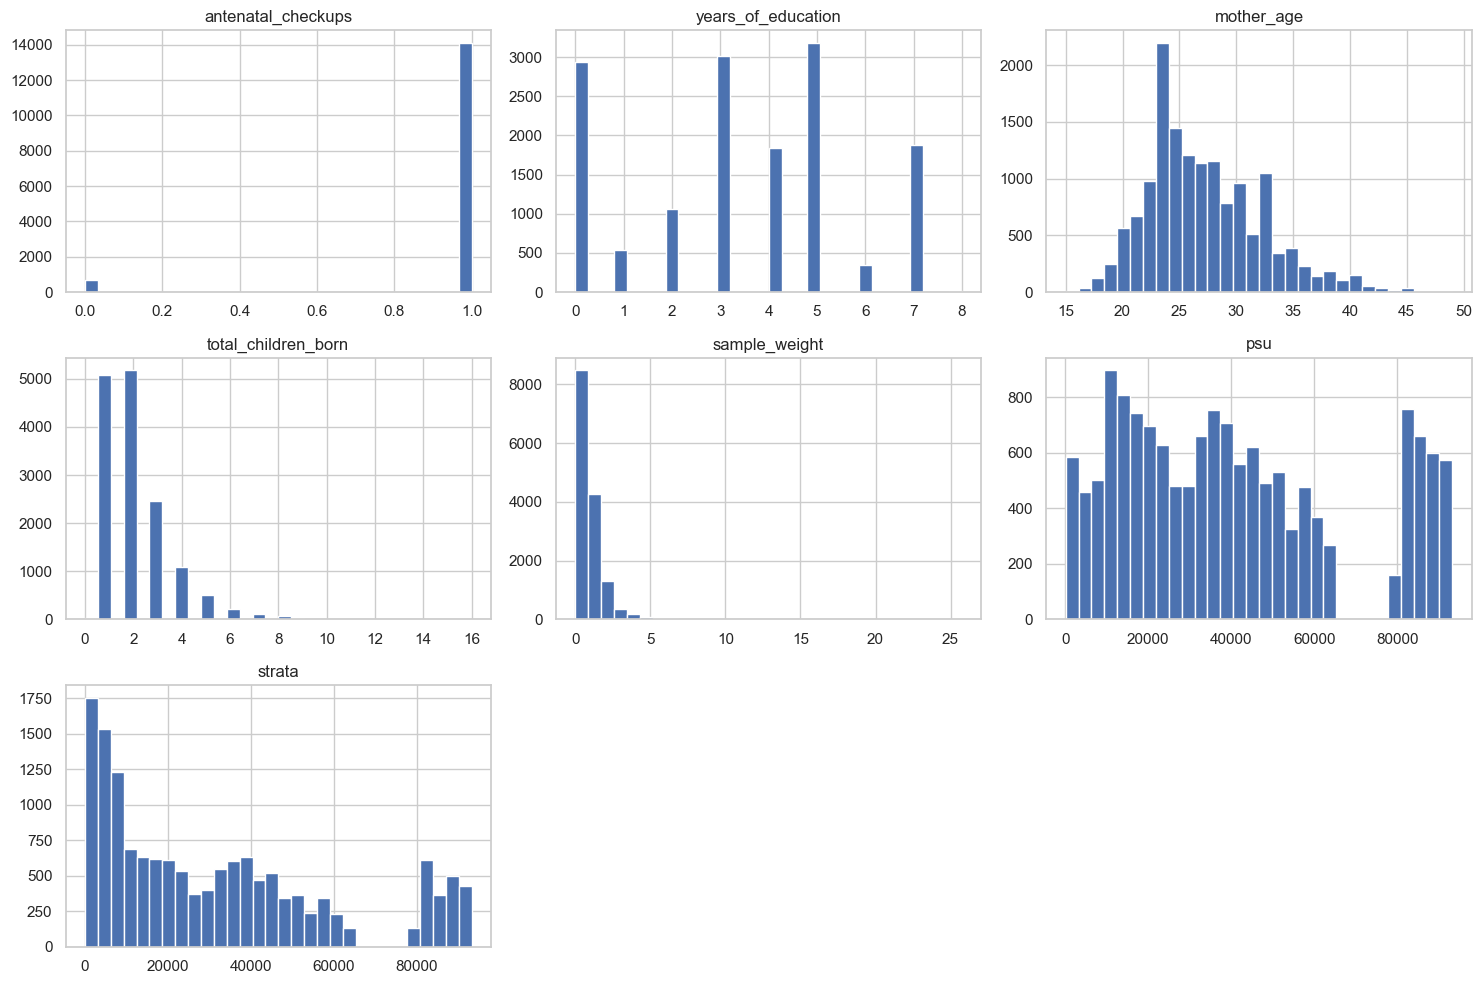

In [22]:
# Histograms for all numerical variables
df.select_dtypes(include='number').hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


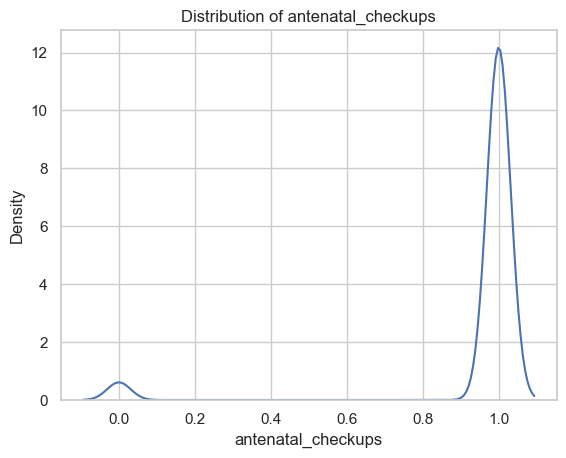

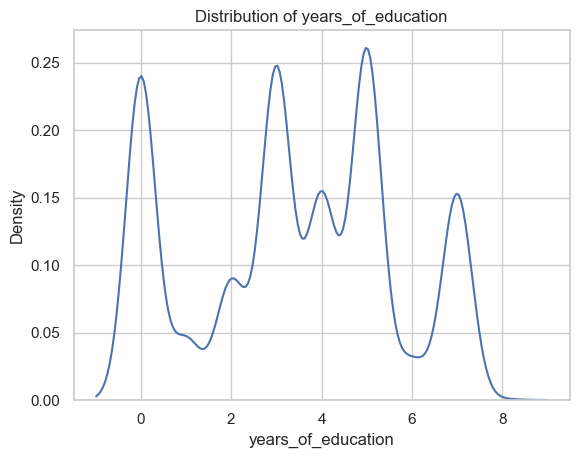

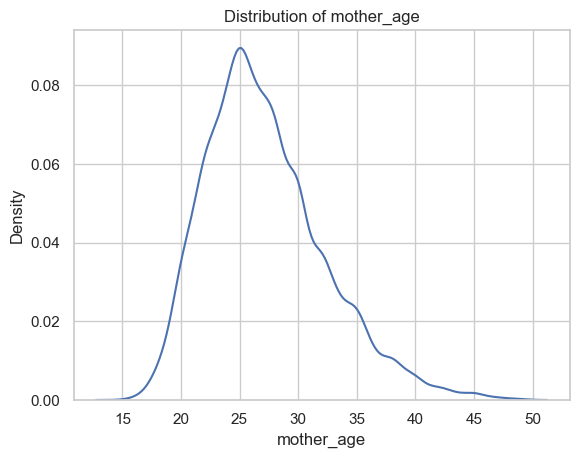

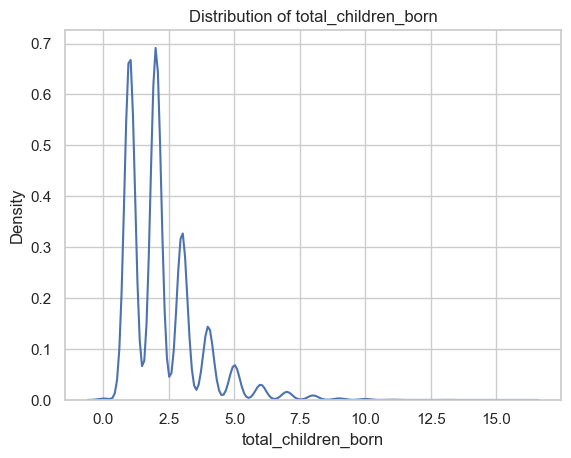

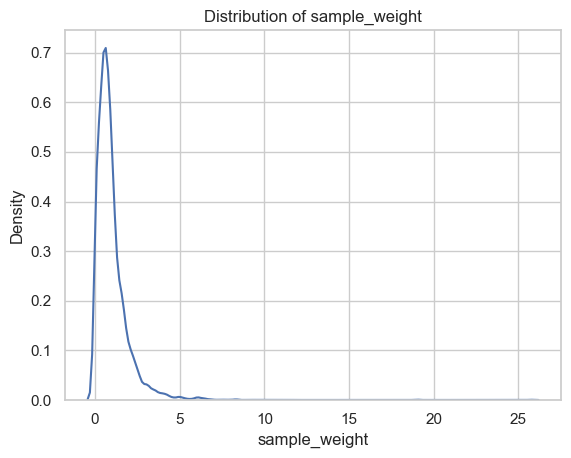

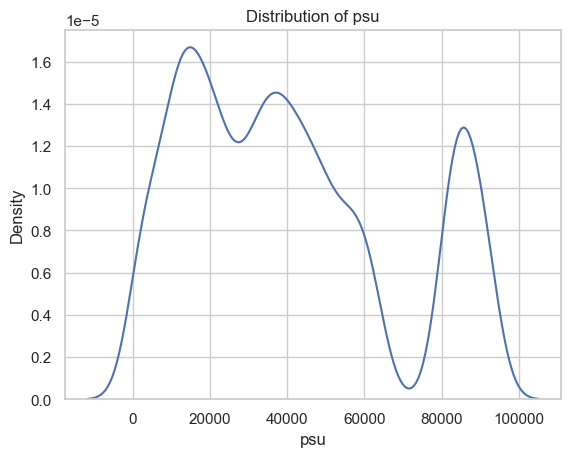

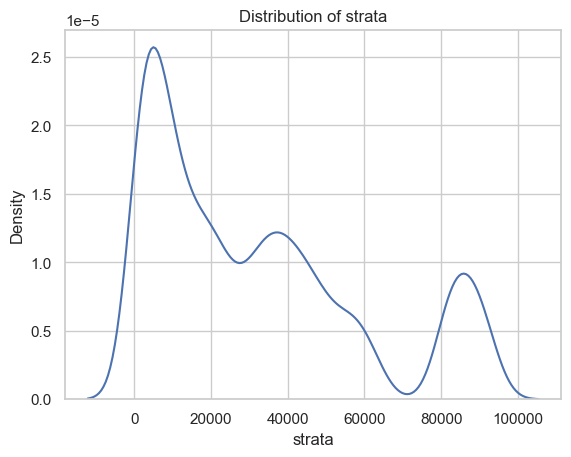

In [23]:
for col in df.select_dtypes(include='number').columns:
    sns.kdeplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


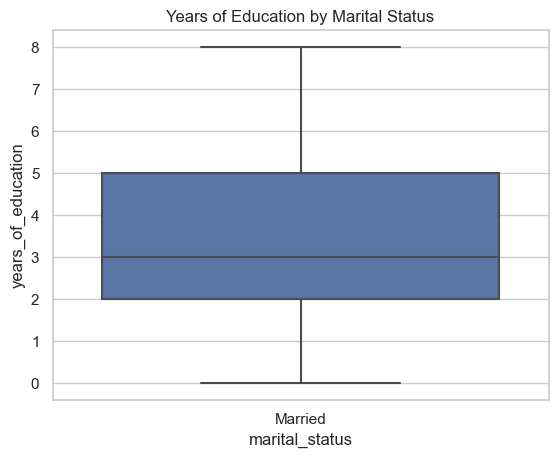

In [24]:
sns.boxplot(x='marital_status', y='years_of_education', data=df)
plt.title('Years of Education by Marital Status')
plt.show()



In [25]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Label encode ordinal variables
df_encoded['education_level'] = le.fit_transform(df_encoded['education_level'])
df_encoded['wealth_index'] = le.fit_transform(df_encoded['wealth_index'])


In [26]:
# Define nominal columns
nominal_cols = ['region', 'religion', 'residence_type', 'caste', 'marital_status']

# One-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)


In [27]:
print("Encoded DataFrame shape:", df_encoded.shape)
df_encoded.head()


Encoded DataFrame shape: (14811, 56)


,antenatal_checkups,education_level,years_of_education,wealth_index,mother_age,total_children_born,sample_weight,psu,strata,region_Andhra Pradesh,...,religion_Jain,religion_Muslim,religion_No religion,religion_Other,religion_Parsi / Zoroastrian,religion_Sikh,residence_type_Urban,caste_Don't know,caste_No caste / tribe,caste_Tribe
4,1.0,3,5.0,3,31,2,0.196628,109,121,False,...,False,True,False,False,False,False,False,False,False,True
6,1.0,0,3.0,3,25,1,0.196628,109,121,False,...,False,True,False,False,False,False,False,False,False,False
8,1.0,3,5.0,3,26,1,0.196628,109,121,False,...,False,True,False,False,False,False,False,False,False,True
17,1.0,3,3.0,3,30,2,0.190855,121,121,False,...,False,True,False,False,False,False,False,False,False,False
21,1.0,3,4.0,0,30,1,0.198268,127,121,False,...,False,True,False,False,False,False,False,False,False,False


In [28]:
df_encoded = df_encoded.drop(columns=['sample_weight', 'psu', 'strata'])


In [29]:
print("Encoded DataFrame shape:", df_encoded.shape)
df_encoded.head(10)


Encoded DataFrame shape: (14811, 53)


,antenatal_checkups,education_level,years_of_education,wealth_index,mother_age,total_children_born,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,...,religion_Jain,religion_Muslim,religion_No religion,religion_Other,religion_Parsi / Zoroastrian,religion_Sikh,residence_type_Urban,caste_Don't know,caste_No caste / tribe,caste_Tribe
4,1.0,3,5.0,3,31,2,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
6,1.0,0,3.0,3,25,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,1.0,3,5.0,3,26,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
17,1.0,3,3.0,3,30,2,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
21,1.0,3,4.0,0,30,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
29,1.0,3,3.0,1,27,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
31,1.0,1,0.0,2,41,5,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34,1.0,3,7.0,4,33,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
39,1.0,3,5.0,3,30,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
41,1.0,3,7.0,0,33,2,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [30]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_cols = ['years_of_education', 'mother_age', 'total_children_born']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Check the result
print("Scaled DataFrame shape:", df_encoded.shape)
df_encoded.head(10)


Scaled DataFrame shape: (14811, 53)


,antenatal_checkups,education_level,years_of_education,wealth_index,mother_age,total_children_born,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,...,religion_Jain,religion_Muslim,religion_No religion,religion_Other,religion_Parsi / Zoroastrian,religion_Sikh,residence_type_Urban,caste_Don't know,caste_No caste / tribe,caste_Tribe
4,1.0,3,0.713188,3,0.751082,-0.163310,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
6,1.0,0,-0.173828,3,-0.427649,-0.890329,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,1.0,3,0.713188,3,-0.231194,-0.890329,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
17,1.0,3,-0.173828,3,0.554627,-0.163310,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
21,1.0,3,0.269680,0,0.554627,-0.890329,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
29,1.0,3,-0.173828,1,-0.034739,-0.890329,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
31,1.0,1,-1.504350,2,2.715634,2.017744,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34,1.0,3,1.600203,4,1.143992,-0.890329,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
39,1.0,3,0.713188,3,0.554627,-0.890329,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
41,1.0,3,1.600203,0,1.143992,-0.163310,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [37]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('antenatal_checkups', axis=1)
y = df_encoded['antenatal_checkups']
# flip y so that 1="doesnot recive antinatal checkups",0 = "receive antinatal checkups"
y = 1-y
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (11848, 52)
Testing features shape: (2963, 52)
Training target shape: (11848,)
Testing target shape: (2963,)


In [42]:
# pip install -U scikit-learn imbalanced-learn


In [39]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Step 1: Check class distribution in y_train
class_counts = Counter(y_train)
print("Class distribution before resampling:", class_counts)

# Step 2: Decide whether to apply SMOTE based on imbalance ratio
majority_class = max(class_counts.values())
minority_class = min(class_counts.values())
imbalance_ratio = minority_class / majority_class

if imbalance_ratio < 0.9:
    print("Imbalance detected. Applying SMOTE...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("Class distribution after SMOTE:", Counter(y_train_resampled))
else:
    print("No significant imbalance detected. Proceeding without SMOTE.")
    X_train_resampled, y_train_resampled = X_train, y_train


Class distribution before resampling: Counter({0.0: 11284, 1.0: 564})
Imbalance detected. Applying SMOTE...
Class distribution after SMOTE: Counter({0.0: 11284, 1.0: 11284})


Best Parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

Model Performance Metrics:
Accuracy: 0.833952075599055
Precision: 0.14545454545454545
Recall: 0.5106382978723404
F1 Score: 0.22641509433962265
AUC Score: 0.7720531688707271


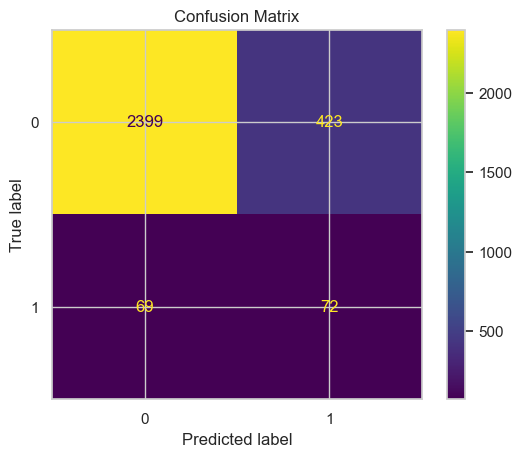

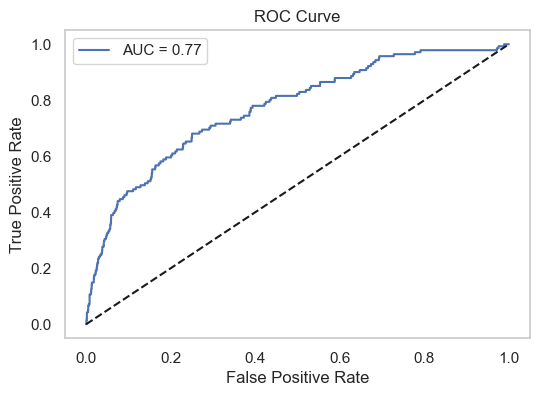

Cross-Validated F1 Scores: [0.8448741  0.84462151 0.83924192 0.84461264 0.84686305]
Average CV F1 Score: 0.8440426461224447


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)

# Step 1: Define parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],        # Regularization type
    'solver': ['lbfgs'],      # Optimizer
    'max_iter': [1000]        # To ensure convergence
}

# Step 2: Initialize Logistic Regression and GridSearchCV
log_reg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Step 3: Best model after tuning
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 4: Predict on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Step 5: Evaluation metrics
print("\nModel Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Step 7: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Step 8: K-Fold Cross Validation (on resampled train set)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')
print("Cross-Validated F1 Scores:", cv_scores)
print("Average CV F1 Score:", np.mean(cv_scores))


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Model Performance Metrics:
Accuracy: 0.8710766115423557
Precision: 0.16986301369863013
Recall: 0.4397163120567376
F1 Score: 0.2450592885375494
AUC Score: 0.7575169262783299


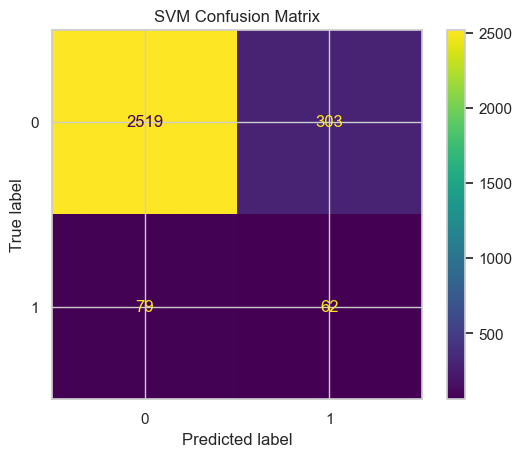

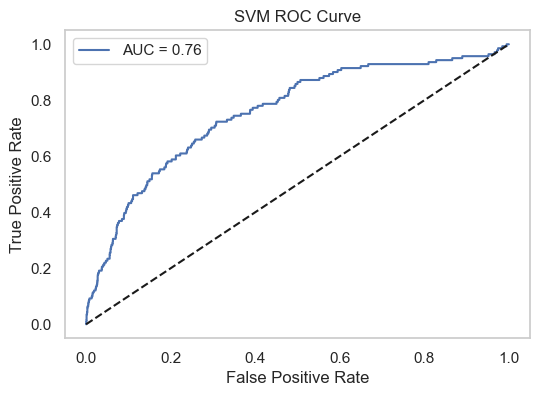

Cross-Validated F1 Scores: [0.90328228 0.90174908 0.90332392 0.9043894  0.90579235]
Average CV F1 Score: 0.9037074045615089


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)

# Step 1: Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # You can add 'poly', 'sigmoid' if needed
    'gamma': ['scale', 'auto']
}

# Step 2: Initialize SVM and GridSearchCV
svm = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Step 3: Best model after tuning
best_svm = grid_search_svm.best_estimator_
print("Best Parameters:", grid_search_svm.best_params_)

# Step 4: Predict on test set
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]

# Step 5: Evaluation metrics
print("\nSVM Model Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("AUC Score:", roc_auc_score(y_test, y_proba_svm))

# Step 6: Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title("SVM Confusion Matrix")
plt.show()

# Step 7: ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label='AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_svm)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Step 8: K-Fold Cross Validation (on resampled train set)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_svm = cross_val_score(best_svm, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')
print("Cross-Validated F1 Scores:", cv_scores_svm)
print("Average CV F1 Score:", np.mean(cv_scores_svm))



Top 10 Influential Features (Logistic Regression):
                     Feature  Coefficient   Odds Ratio
27           region_Nagaland     7.544386  1890.101625
8               region_Bihar     6.804212   901.636595
37      region_Uttar Pradesh     6.186210   486.000439
17          region_Jharkhand     6.147308   467.457302
25          region_Meghalaya     5.876859   356.686955
6   region_Arunachal Pradesh     5.792898   327.962219
15   region_Himachal Pradesh     5.351987   211.027220
7               region_Assam     5.135162   169.891832
39        region_West Bengal     4.950916   141.304349
22     region_Madhya Pradesh     4.775364   118.553443


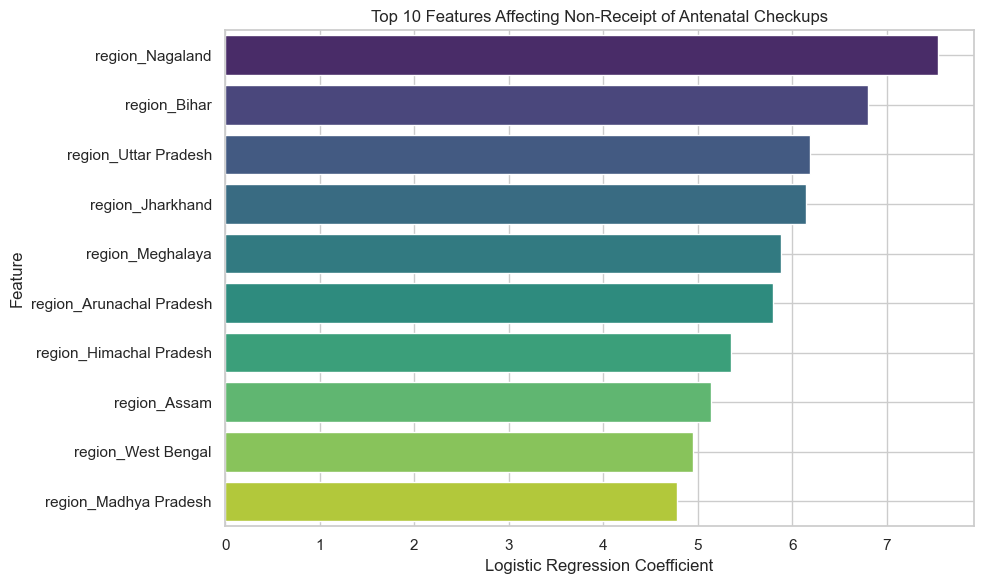

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 9: Feature Importance using Coefficients
feature_names = X_train_resampled.columns  # Assuming X is a DataFrame
coefficients = best_model.coef_[0]
odds_ratios = np.exp(coefficients)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    'Abs Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value
feature_importance = feature_importance.sort_values(by='Abs Coefficient', ascending=False)

# Display top 10 most influential features
print("\nTop 10 Influential Features (Logistic Regression):")
print(feature_importance[['Feature', 'Coefficient', 'Odds Ratio']].head(10))

# Step 10: Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=feature_importance.head(10),
    palette='viridis'
)
plt.title('Top 10 Features Affecting Non-Receipt of Antenatal Checkups')
plt.xlabel('Logistic Regression Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()



Top Contributing Features (Aggregated Logistic Regression Coefficients):
  Base Feature  Mean |Coefficient|  Sum |Coefficient|    L2 Norm
5       region            3.818655         133.652913  25.469688
6     religion            2.532832          20.262659   8.539691
8        caste            0.554936           1.664807   1.048873
1        years            0.448986           0.448986   0.448986
7    residence            0.417166           0.417166   0.417166
4        total            0.367388           0.367388   0.367388
3       mother            0.157840           0.157840   0.157840
2       wealth            0.084604           0.084604   0.084604
0    education            0.079795           0.079795   0.079795


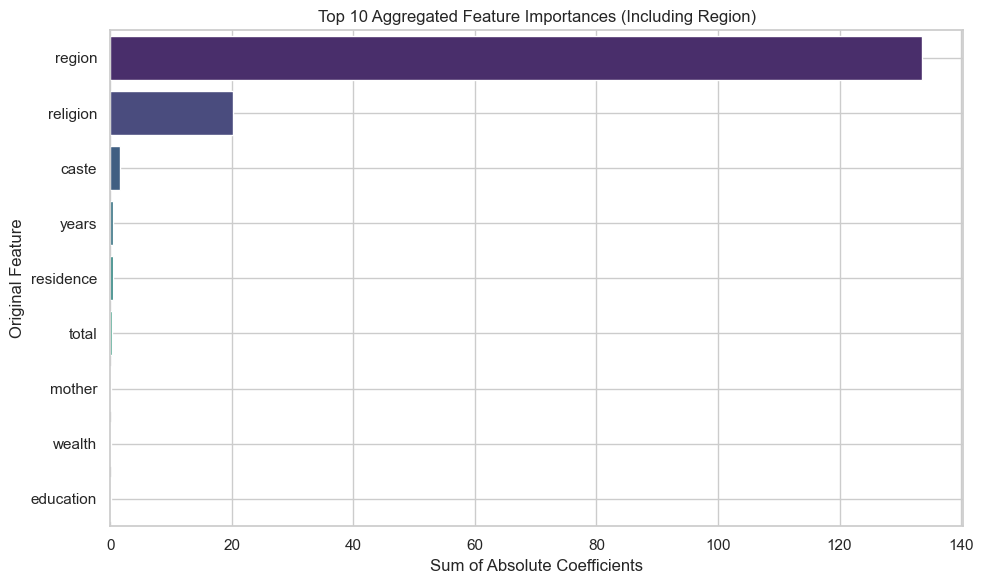

In [54]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fit logistic regression using best parameters (already tuned via GridSearchCV)
log_reg_full = LogisticRegression(
    C=grid_search.best_params_['C'],
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
log_reg_full.fit(X_train_resampled, y_train_resampled)

# Step 2: Extract coefficients and feature names
coefficients = log_reg_full.coef_[0]
feature_names = X_train_resampled.columns

# Step 3: Aggregate importance by base feature (e.g., 'education', 'region', etc.)
aggregated_importance = defaultdict(list)

for coef, name in zip(coefficients, feature_names):
    base_feature = name.split('_')[0]  # adjust if another encoding style is used
    aggregated_importance[base_feature].append(coef)

# Step 4: Compute summary statistics per base feature
summary = []
for feature, coefs in aggregated_importance.items():
    abs_sum = np.sum(np.abs(coefs))
    mean_abs = np.mean(np.abs(coefs))
    l2_norm = np.sqrt(np.sum(np.square(coefs)))
    summary.append({
        'Base Feature': feature,
        'Mean |Coefficient|': mean_abs,
        'Sum |Coefficient|': abs_sum,
        'L2 Norm': l2_norm
    })

importance_df = pd.DataFrame(summary).sort_values(by='Sum |Coefficient|', ascending=False)

# Step 5: Display and plot top features
print("\nTop Contributing Features (Aggregated Logistic Regression Coefficients):")
print(importance_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(10),
    y='Base Feature',
    x='Sum |Coefficient|',
    palette='viridis'
)
plt.title('Top 10 Aggregated Feature Importances (Including Region)')
plt.xlabel('Sum of Absolute Coefficients')
plt.ylabel('Original Feature')
plt.tight_layout()
plt.grid(True)
plt.show()
